# Decision trees 

1. [EDA - exploratory data analysis](#section1)
2. [Build a model](#section2)

    2.1 [Define](#section2.1)    
    2.2 [Fit](#section2.2)    
    2.3 [Predict](#section2.3)    
    2.4 [Evalaute](#section2.4)

3. [Select informative attributes](#section3)

    3.1 [Petal vs. Sepal](#section3.1) 

4. [Overfitting and Underfitting](#section4)


<div>
<img src="images/tree.jpg" width="400"/>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<div>
<img src="images/iris.jpg" width="300"/>
</div>

<a id='section1'></a>

## 1. EDA

In [3]:
pd.pivot_table(iris_df,index=['class'],values=['sepal_length','sepal_width','petal_length','petal_width'])

,petal_length,petal_width,sepal_length,sepal_width
class,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


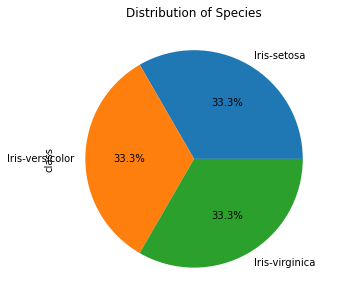

In [67]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Species")
iris_df['class'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

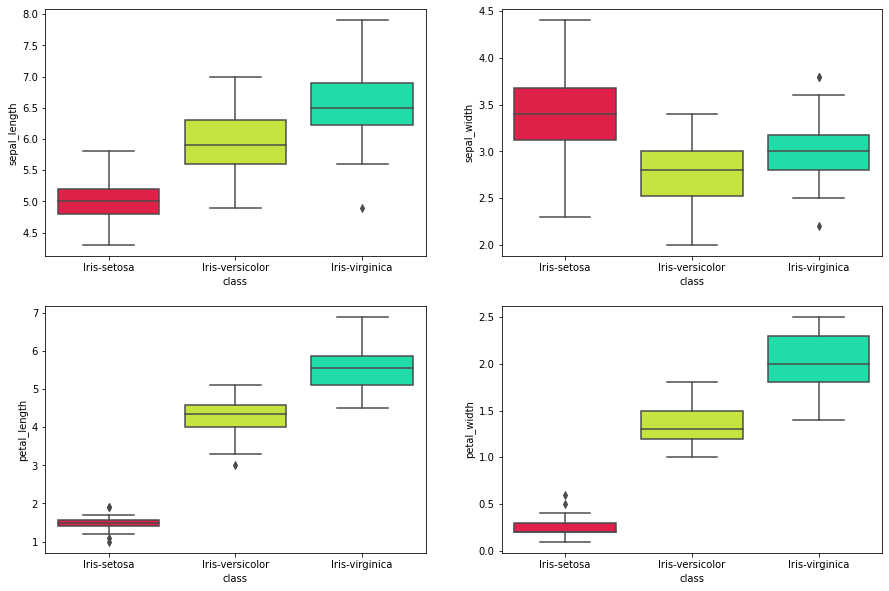

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'sepal_length', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'sepal_width', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'petal_length', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'petal_width', data = iris_df, palette="gist_ncar_r")
plt.show()

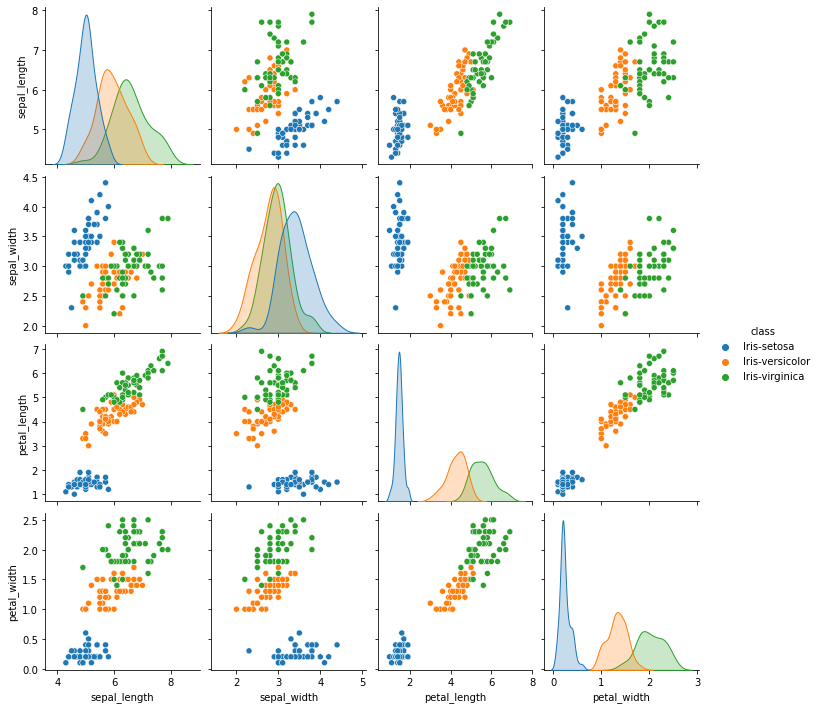

In [6]:
sns.pairplot(iris_df, hue='class')
plt.show()

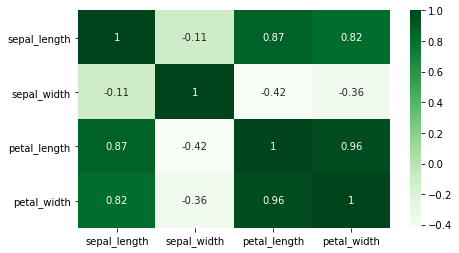

In [7]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_df.corr(),annot=True,cmap='Greens') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

##### Observation

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. 

Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

<a id='section2'></a>

## 2. Build a classification model

<a id='section2.1'></a>
### 2.1 Define the model: 
we will use a decision tree based on the gini index (gini index is the default)

In [69]:
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")

<a id='section2.2'></a>
### 2.2 Fit the model on the data:

Define what are the features (x) and what is the target (y)

In [70]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

Use the model we chose on the features we chose (X and y)

In [71]:
model1.fit(X, y)

DecisionTreeClassifier()

now model1 is a tree, and it has tree features:

In [72]:
type(model1)

sklearn.tree._classes.DecisionTreeClassifier

In [73]:
model1.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

Let's see what we got:

In [74]:
text_representation = tree.export_text(model1)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



Vizualize:

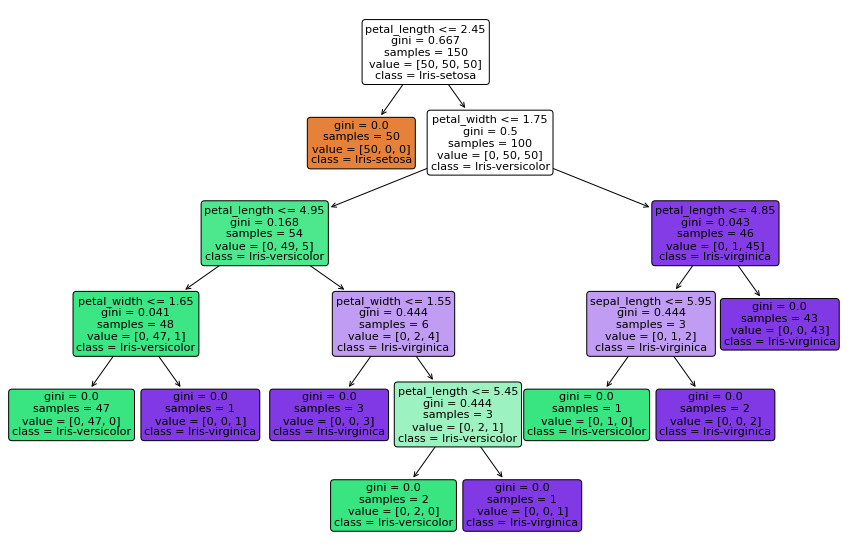

In [75]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(model1, 
               feature_names = features, 
               class_names = model1.classes_,
               filled=True, 
               rounded = True)  
plt.show()

That's nice. But how well will it predict on new data?

<a id='section2.3'></a>
### 2.3 Predict

##### Split the data to 70% train set and 30% test

In [76]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [77]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3


In [78]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1


In [79]:
y_test.head(2)

14        Iris-setosa
98    Iris-versicolor
Name: class, dtype: object

##### Use the training data to train the model (a new model - model2)

In [80]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

##### Finally - predict:

In [81]:
prediction2 = model2.predict(X_test)
prediction2 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

present in a nicer format:

In [82]:
df = pd.DataFrame(columns = ['class', 'predictions'])

In [83]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [84]:
df['predictions'] = pd.Series(prediction2)
df.head()

,class,predictions
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica


<a id='section2.4'></a>
### 2.4 Evaluate

There are various ways to measure accuracy:

The most obvious - (number of correct)/(total)  

In [24]:
sk.metrics.accuracy_score(prediction2, y_test)

0.9555555555555556

A truth table

In [25]:
sk.metrics.confusion_matrix(y_test, prediction2)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

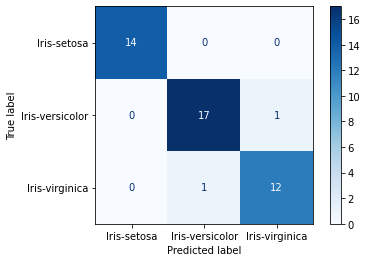

In [26]:
sk.metrics.plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)

Precision, Recall and F1 score - most common. But out of scope for this course

In [27]:
print(sk.metrics.classification_report(y_test, prediction2, target_names=model2.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section3'></a>
## 3. Feature importance

Which attributes are the most important?

In [28]:
model1.feature_importances_

array([0.02666667, 0.        , 0.05072262, 0.92261071])

organize it in a nicer format:

In [29]:
feature_importances = pd.DataFrame(model2.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_length,0.571965
petal_width,0.385096
sepal_length,0.021469
sepal_width,0.021469


<a id='section3.1'></a>
### 3.1 Petal vs. Sepal 

We see that petal is most important. What happens if we only use sepal?

In [85]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6222222222222222


In [86]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

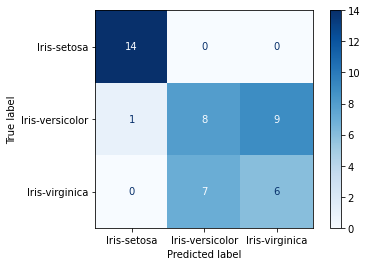

In [87]:
sk.metrics.plot_confusion_matrix(model_s, X_test_s, y_test_s, cmap=plt.cm.Blues)

In [88]:
#mixed_df = iris_df[['sepal_length','petal_width','class']]
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini")
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


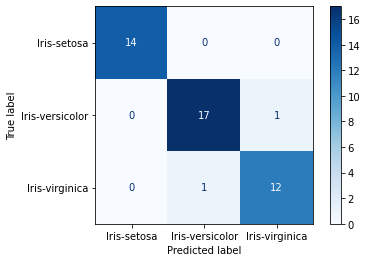

In [89]:
sk.metrics.plot_confusion_matrix(model_mix, X_test_m, y_test_m, cmap=plt.cm.Blues)

<a id='section4'></a>
## 4. Overfitting and underfitting

In [62]:
def get_acc(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [63]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

In [64]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [65]:
for max_leaf_nodes in [2, 4, 6, 8, 10]:
    my_acc = get_acc(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_acc)

2 0.6
4 0.9555555555555556
6 0.9555555555555556
8 0.9555555555555556
10 0.9555555555555556


---
> Terminology:
>
>* features - attributes
>
>* class/target - the feature we want to predict
>
>* [A guide to trees - scikit-learn](https://scikit-learn.org/stable/modules/tree.html)
>
> A summary of new functions:
>
>* `plot.pie(autopct="%1.1f%%")` - a pie plot. autopct adds percentages to each of the slices of the pie chart, 1.1 - percentages with 1 number after the decimal dot.
>
>* [DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
>
>* `my_model = sk.tree.DecisionTreeClassifier(criterion="gini")` - decision tree model with the gini index as the node splitting criterion
>
>* `my_model.fit(X, y)` - train the model. X are the features and y is the target/class.
>
>* `my_model.feature_importances_` - shows how important is each of the features in model `my_model`
>
>* `sk.model_selection.train_test_split` - splits the data to train and test
>
>* `tree.export_text(my_model)` - shows the tree of the model in text format. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)
>
>* `tree.plot_tree` - plots a nice decision tree. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)
>
>* [Metrics documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
>
>* `sk.metrics.accuracy_score` - computes the model's jaccard accuracy score
>
>* `sk.metrics.confusion_matrix` - a truth table
>
>* `sk.metrics.plot_confusion_matrix` - a confusion matrix
>
> 
---